In [432]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
def potentialSCHW(r, M, L):
    Vsqrd=(1-2*M/r)*(L/r)**2
    return Vsqrd

In [26]:
def potentialKERR(r, M, J, L):
    a=J/M
    beta=r**2-2*M*r+a**2
    Vp=((2*M*r*a+r**2*beta**(0.5))/((r**2+a**2)**2-a**2*beta))*L
    Vn=((2*M*r*a-r**2*beta**(0.5))/((r**2+a**2)**2-a**2*beta))*L
    return Vp, Vn

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


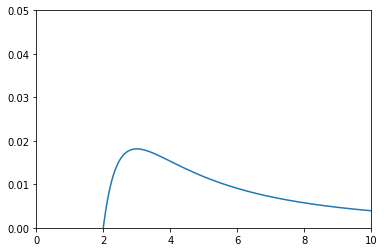

In [23]:
plt.plot(np.arange(0,10,0.001),potentialSCHW(np.arange(0,10,0.001), 1, 0.7))
plt.axis([0,10,0,0.05])
plt.show()

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


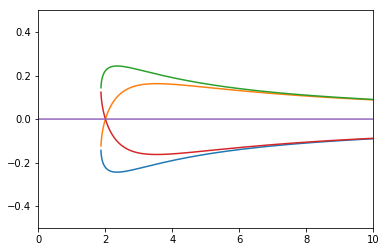

In [80]:
Va=potentialKERR(np.arange(0,10,0.001), 1, 0.5, -1)
Vs=potentialKERR(np.arange(0,10,0.001), 1, 0.5, 1)
plt.plot(np.arange(0,10,0.001),Va[0], np.arange(0,10,0.001), Va[1], np.arange(0,10,0.001),Vs[0], np.arange(0,10,0.001), Vs[1], np.arange(0,10,0.001), np.zeros(int(10/0.001)))
plt.axis([0,10,-0.5,0.5])
plt.show()

In [83]:
#assumes equatorial trajectory, i.e. theta=0
def simSCHW(phiI, b, M, r, dr):
    dphi=1/(r**2*np.sqrt(1/(b**2)-(1-2*M/r)*1/(r**2)))*dr
    phi=np.zeros(len(r))
    for i in range(len(r)):
        phi[i]=phiI+dphi[i]
    return phi


In [110]:
def eqSCHW(phiI, b, M, r, dr):
    dphi=1/(r**2*np.sqrt(1/(b**2)-(1-2*M/r)*1/(r**2)))*dr
    return dphi

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


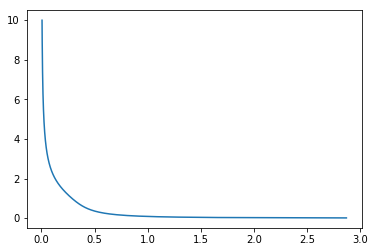

2.22843549758
2.22843549758


In [166]:
plt.plot(eqSCHW(0, 1, 2, np.arange(0,10,0.01), 0.01)*180/math.pi, np.arange(0,10,0.01))
plt.show()
#eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01)
print(sum(eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01)))
print(sum(abs(eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01))))

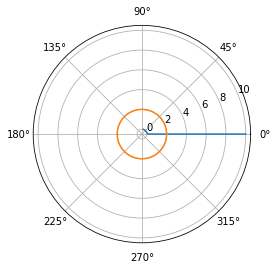

array([  2.13581631e-02,   1.51060163e-02,   1.23365114e-02, ...,
         9.55503257e-08,   9.55312127e-08,   9.55121055e-08])

In [163]:
phiI=0
b=0.01
M=1
dr=0.001
r=np.arange(dr,10,dr)
plt.polar(simSCHW(phiI, b, M, r, dr)*180/math.pi, r, np.arange(0,math.pi*2,0.01), np.ones(len(np.arange(0,math.pi*2,0.01)))*2*M)
plt.show()
simSCHW(phiI, b, M, r, dr)/math.pi*3
#need a polar ploting regime 


In [196]:
def SCHWODE(y,r,M,b):
    dphidr=(r**2*(1/(b**2)-1/(r**2)*(1-2*M/r))**(0.5))**(-1)
    return dphidr

In [167]:
def test(y,t):
    dydt=2*t
    return dydt

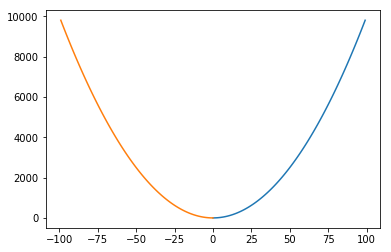

In [330]:
y0=0
t=np.arange(100)
y=scp.integrate.odeint(test, y0, t)
plt.plot(t,y, -t, y)
plt.show()

In [344]:
def SHO(x,t,omega,phi):
    dxdt=-omega*np.sin(omega*t-phi)
    return dxdt

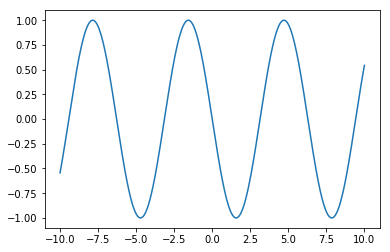

In [351]:
phi=0
x=np.arange(-1,1,0.0001)
t=np.arange(-10,10,0.001)
plt.plot(t,SHO(x,t,1,phi))
plt.show()

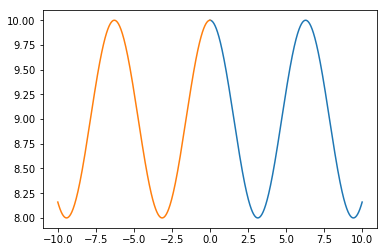

In [483]:
x0=10
t=np.arange(0,10,0.001)
x=scp.integrate.odeint(SHO,x0,t,(1,0))
plt.plot(t,x,-t,x)
plt.show()

[[ 0.52359878]
 [ 0.52358873]
 [ 0.52357869]
 ..., 
 [ 0.11892717]
 [ 0.11867752]
 [ 0.11842764]]


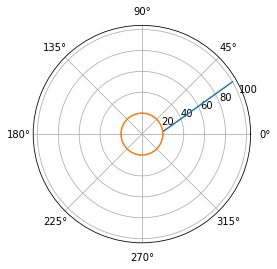

In [503]:
M=10
b=10
r=np.arange(2*M,100,0.01)
r=np.flip(r,0)
argsT=(M,b)
phi0=math.pi/6
phi=scp.integrate.odeint(SCHWODE,phi0,r, args=argsT)
print(phi)
plt.polar(phi,r, np.arange(0,math.pi*2,0.01), np.ones(len(np.arange(0,math.pi*2,0.01)))*2*M)
plt.show()

In [518]:
def SCHWODErphiPOS(rphi,lam,E,M,L):
    r=rphi[0]
    phi=rphi[1]
    drdlam=np.sqrt((E**2)-(1-2*M/r)*L**2/(r**2))
    dphidlam=L/(r**2)
    return (drdlam, dphidlam)

In [519]:
def SCHWODErphiNEG(rphi,lam,E,M,L):
    r=rphi[0]
    phi=rphi[1]
    drdlam=-np.sqrt((E**2)-(1-2*M/r)*L**2/(r**2))
    dphidlam=L/(r**2)
    return (drdlam, dphidlam)

In [494]:
np.arange(-100,0)

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1])

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


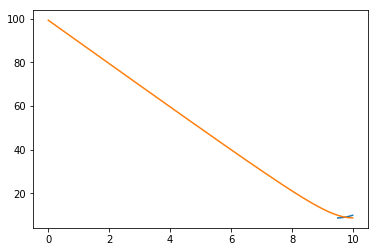

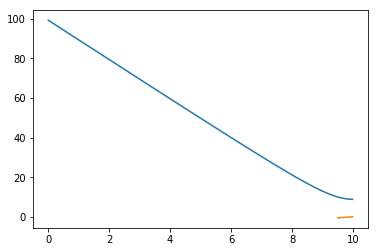

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/matplotlib/projections/polar.py:58: RuntimeWarning: invalid value encountered in less
  mask = r < 0


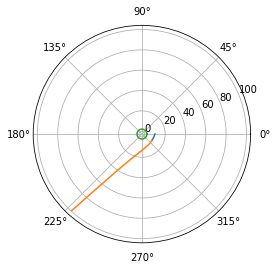

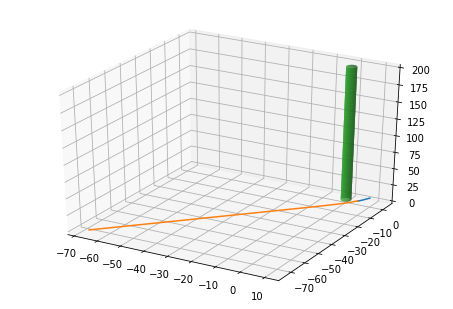

In [599]:
lam=np.arange(0,10,0.01)
#print(lam)
#neglam=np.arange(-100,100,0.01)
#lam=neglam
lam=np.flip(lam,0)
M=1
L=100
E=10
argsT=(E,M,L)
rphi0=(10,0)
#print(rphi0)
rphiPos=scp.integrate.odeint(SCHWODErphiPOS, rphi0, lam, args=argsT)
rphi0=(np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),0]), np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),1]))
rphiNeg=scp.integrate.odeint(SCHWODErphiNEG, rphi0, lam, args=argsT)
plt.plot(lam,rphiPos[:,0],lam, rphiNeg[:,0])
plt.show()
plt.plot(lam,rphiNeg[:,0],lam,rphiPos[:,1])
plt.show()

plt.polar(rphiPos[:,1],rphiPos[:,0], rphiNeg[:,1],rphiNeg[:,0], np.arange(0,math.pi*2,0.01), np.ones(len(np.arange(0,math.pi*2,0.01)))*2*M)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(rphiPos[:,0]*np.cos(rphiPos[:,1]),rphiPos[:,0]*np.sin(rphiPos[:,1]), lam)
ax.plot(rphiNeg[:,0]*np.cos(rphiNeg[:,1]),rphiNeg[:,0]*np.sin(rphiNeg[:,1]), lam)
Xc,Yc,Zc = cylinder(0,0,2,200)
ax.plot_surface(Xc, Yc, Zc, alpha=1)
plt.show()

In [553]:
np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),0])

8.7902131680459927

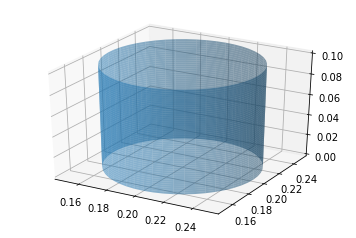

In [457]:
def cylinder(x0,y0,r,height):
    z = np.linspace(0, height, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = r*np.cos(theta_grid) + x0
    y_grid = r*np.sin(theta_grid) + y0
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,0.05,0.1)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

plt.show()